<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/103_DOE_MSR_BBehnken.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseño de Experimentos - 2023: Metodologia de Superficie de Respuesta - Diseño de Box-Behnken**


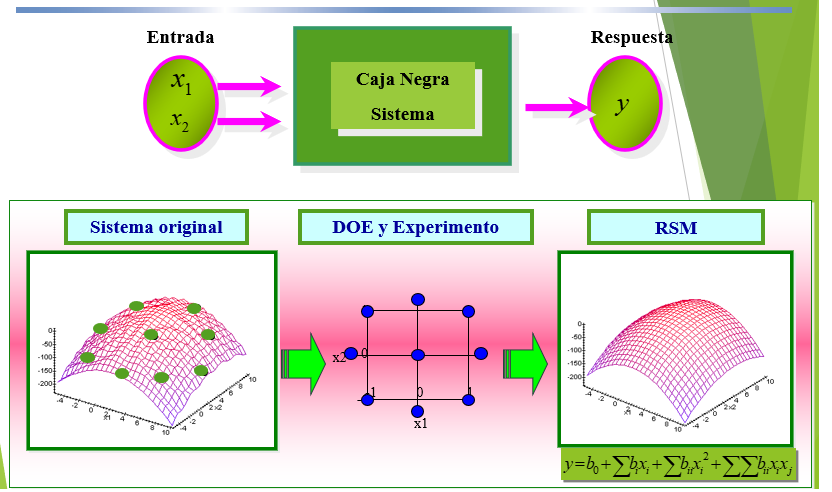


# **Paso 1. Problema de aplicación:**
## **Problema: En el área de desarrollo de una empresa se pretende obtener un nuevo polímero de bajo peso molecular, de lograrse esto, se obtendrá un polímero que funcione como dispersante en la indus tria cerámica. De acuerdo con los conocimientos técnicos que se tienen, se considera que los factores críticos son: persulfato de sodio (NaPS), ácido hipofosforoso (H3PO2) y el isopropanol (IPA). Para encontrar las condiciones óptimas de estos tres factores, se corrió el diseño de superficie de respuesta (Box-Behnken):**





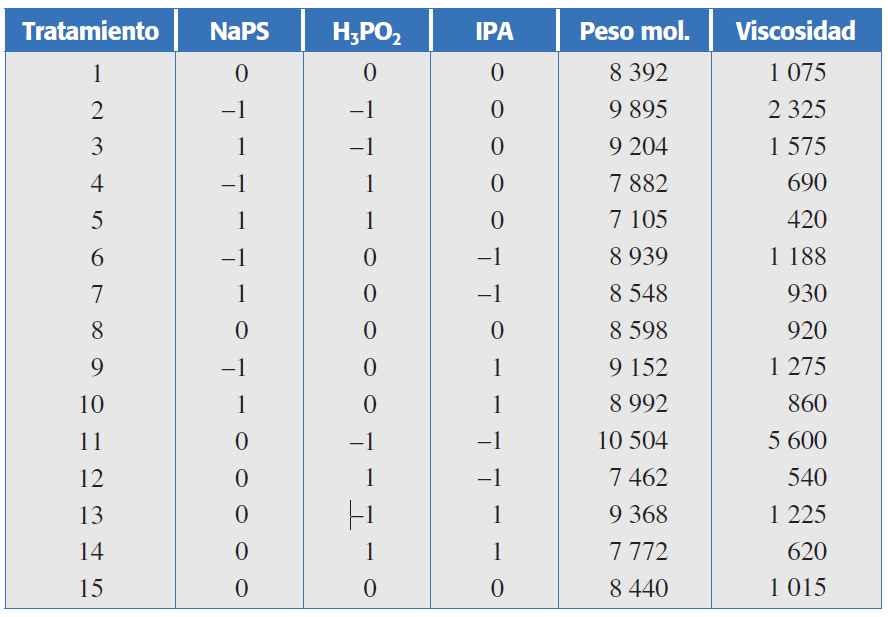

# **Paso_2. Librerias a usar**

In [1]:
import pandas as pd
import numpy as np                    ## Este proporciona una estructura similiar a los data.frame
import statsmodels.api as sm           ## Este proporciona funciones para la estimación de muchos modelos estadísticos
import statsmodels.formula.api as smf  ## Permite ajustar modelos estadísticos utilizando fórmulas de estilo R
from statsmodels.formula.api import ols

# **Paso_3. Los Datos al inicio**

## **a1. Ingresando los datos del problema a Python**

In [2]:
# Crear un DataFrame con los datos proporcionados
data = {
    "NaPS":  [0, -1, 1, -1, 1, -1, 1, 0, -1, 1, 0, 0, 0, 0, 0],
    "H3PO2": [0, -1, -1, 1, 1, 0, 0, 0, 0, 0, -1, 1, -1, 1, 0],
    "IPA":   [0, 0, 0, 0, 0, -1, -1, 0, 1, 1, -1, -1, 1, 1, 0],
    "Peso_mol": [8392, 9895, 9204, 7882, 7105, 8939, 8548, 8598, 9152, 8992, 10504, 7462, 9368, 7772, 8440],
    "Viscocidad": [1075, 2325, 1575, 690, 420, 1188, 930, 920, 1275, 860, 5600, 540, 1225, 620, 1015]
}

## **a2. El DataFrame inical**

In [3]:
Behnken = pd.DataFrame(data)
Behnken

,NaPS,H3PO2,IPA,Peso_mol,Viscocidad
0,0,0,0,8392,1075
1,-1,-1,0,9895,2325
2,1,-1,0,9204,1575
3,-1,1,0,7882,690
4,1,1,0,7105,420
5,-1,0,-1,8939,1188
6,1,0,-1,8548,930
7,0,0,0,8598,920
8,-1,0,1,9152,1275
9,1,0,1,8992,860


# **Paso_3. Los Scatterplot**

## **a1. El scatterplot Peso_mol vs NaPS - H3PO2**


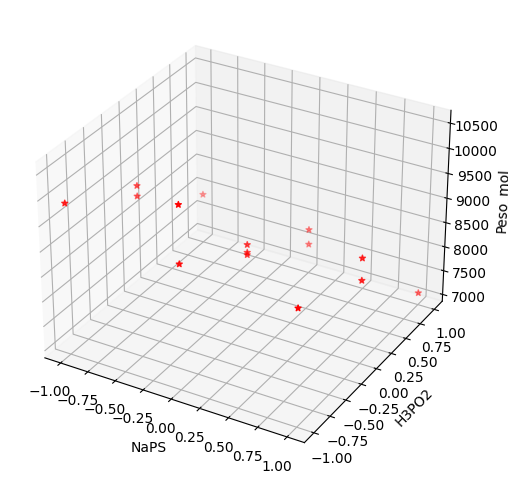

In [4]:
import matplotlib.pyplot as plt             # Permite la generación de gráficos
from mpl_toolkits.mplot3d import Axes3D   # Permite agregar eje tridimensionales
#import random                             # Permiten obtener de distintos modos números aleatorios

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection ="3d")

x = Behnken["NaPS"]                             # Datos eje X
y = Behnken["H3PO2"]
z = Behnken["IPA"]
                             # Datos eje Y
w1 = Behnken['Peso_mol']                               # Datos eje Z (Var. Respuesta)

ax.scatter3D(x, y, w1, marker='*', c='r')
ax.set_xlabel('NaPS')        # Etiqueta del eje X
ax.set_ylabel('H3PO2')       # Etiqueta del eje Y
ax.set_zlabel('Peso_mol')
plt.show()

## **a2. El scatterplot Peso_mol vs NaPS - IPA**

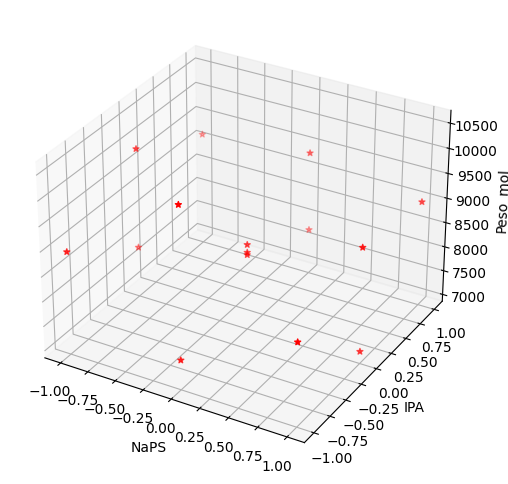

In [5]:
import matplotlib.pyplot as plt             # Permite la generación de gráficos
from mpl_toolkits.mplot3d import Axes3D   # Permite agregar eje tridimensionales
#import random                             # Permiten obtener de distintos modos números aleatorios

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection ="3d")

x = Behnken["NaPS"]                             # Datos eje X
y = Behnken["H3PO2"]
z = Behnken["IPA"]
                             # Datos eje Y
w1 = Behnken['Peso_mol']                               # Datos eje Z (Var. Respuesta)

ax.scatter3D(x, z, w1, marker='*', c='r')
ax.set_xlabel('NaPS')        # Etiqueta del eje X
ax.set_ylabel('IPA')       # Etiqueta del eje Y
ax.set_zlabel('Peso_mol')
plt.show()

## **a3. El scatterplot Viscocidad vs NaPS - H3PO2**


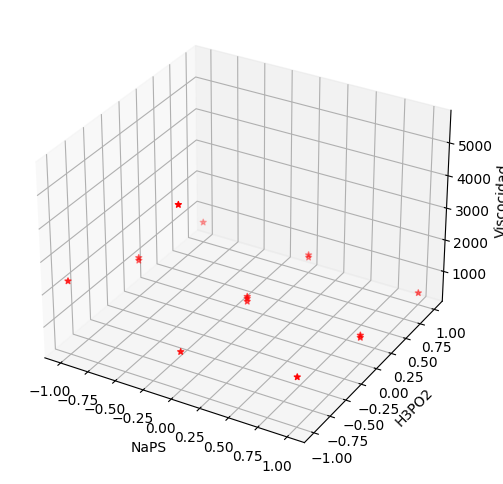

In [6]:
import matplotlib.pyplot as plt             # Permite la generación de gráficos
from mpl_toolkits.mplot3d import Axes3D   # Permite agregar eje tridimensionales
#import random                             # Permiten obtener de distintos modos números aleatorios

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection ="3d")

x = Behnken["NaPS"]                             # Datos eje X
y = Behnken["H3PO2"]
z = Behnken["IPA"]
                             # Datos eje Y
w2 = Behnken['Viscocidad']                               # Datos eje Z (Var. Respuesta)

ax.scatter3D(x, y, w2, marker='*', c='r')
                             # Datos eje Z (Var. Respuesta)

ax.set_xlabel('NaPS')        # Etiqueta del eje X
ax.set_ylabel('H3PO2')       # Etiqueta del eje Y
ax.set_zlabel('Viscocidad')
plt.show()

## **a4. El scatterplot Viscocidad vs NaPS - IPA**

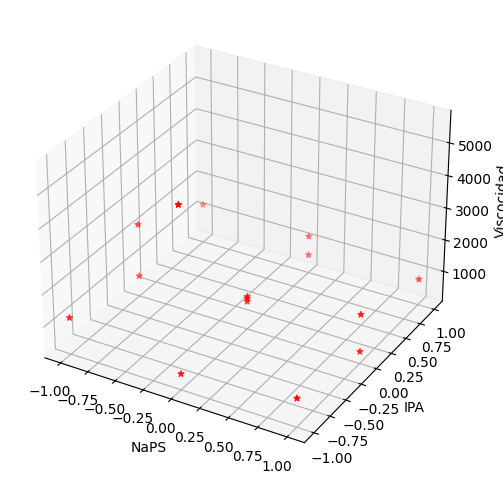

In [7]:
import matplotlib.pyplot as plt             # Permite la generación de gráficos
from mpl_toolkits.mplot3d import Axes3D   # Permite agregar eje tridimensionales
#import random                             # Permiten obtener de distintos modos números aleatorios

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection ="3d")

x = Behnken["NaPS"]                             # Datos eje X
y = Behnken["H3PO2"]
z = Behnken["IPA"]
                             # Datos eje Y
w2 = Behnken['Viscocidad']                               # Datos eje Z (Var. Respuesta)

ax.scatter3D(x, z, w2, marker='*', c='r')
                             # Datos eje Z (Var. Respuesta)
ax.set_xlabel('NaPS')        # Etiqueta del eje X
ax.set_ylabel('IPA')       # Etiqueta del eje Y
ax.set_zlabel('Viscocidad')
plt.show()

# **Paso_4. El Modelo de regresión lineal - Peso_mol**

## **a. Para la variable - Modelo de Mínimos cuadrados**

In [8]:
mod1 = sm.OLS.from_formula('w1 ~ (x+y+z)**2 +  np.power(x,2) + np.power(y,2) + np.power(z,2)', data=Behnken).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                     w1   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     14.07
Date:                Wed, 11 Oct 2023   Prob (F-statistic):            0.00476
Time:                        15:22:42   Log-Likelihood:                -98.396
No. Observations:                  15   AIC:                             216.8
Df Residuals:                       5   BIC:                             223.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       8476.6667    170.849     49.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## **b. Parámetros del Modelo de regresión lineal**

In [9]:
mod1.params

Intercept         8476.666667
x                 -252.375000
y                -1093.750000
z                  -21.125000
x:y                -21.500000
x:z                 57.750000
y:z                361.500000
np.power(x, 2)      88.041667
np.power(y, 2)     -43.208333
np.power(z, 2)     343.041667
dtype: float64

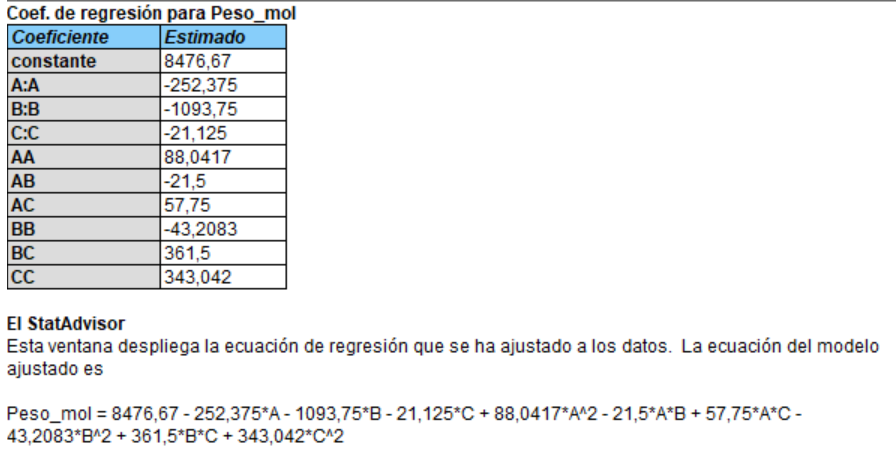

## **c. El Modelo Anova del Modelo de regresión lineal - Peso_mol**

In [10]:
anova_result = sm.stats.anova_lm(mod1, typ=1)
print (anova_result)

                 df        sum_sq       mean_sq           F    PR(>F)
x               1.0  5.095451e+05  5.095451e+05    5.818832  0.060697
y               1.0  9.570313e+06  9.570313e+06  109.289712  0.000138
z               1.0  3.570125e+03  3.570125e+03    0.040770  0.847941
x:y             1.0  1.849000e+03  1.849000e+03    0.021115  0.890142
x:z             1.0  1.334025e+04  1.334025e+04    0.152341  0.712382
y:z             1.0  5.227290e+05  5.227290e+05    5.969387  0.058421
np.power(x, 2)  1.0  1.657186e+04  1.657186e+04    0.189245  0.681682
np.power(y, 2)  1.0  1.799061e+04  1.799061e+04    0.205447  0.669352
np.power(z, 2)  1.0  4.345019e+05  4.345019e+05    4.961863  0.076402
Residual        5.0  4.378414e+05  8.756828e+04         NaN       NaN


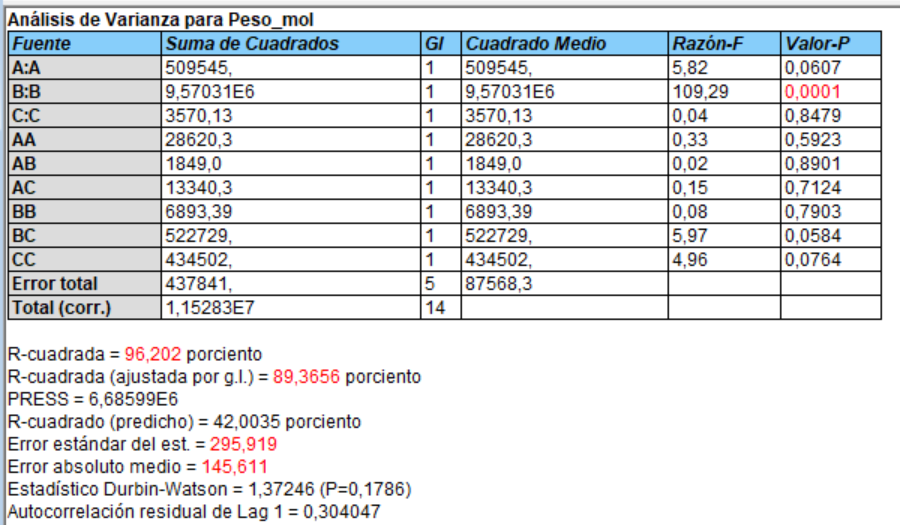

# **Paso_4. El Modelo de regresión lineal - Viscocidad**

## **a. Para la variable - Modelo de Mínimos cuadrados**

In [11]:
mod2 = sm.OLS.from_formula('w2 ~ (x+y+z)**2 +  np.power(x,2) + np.power(y,2) + np.power(z,2)', data=Behnken).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                     w2   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     3.120
Date:                Wed, 11 Oct 2023   Prob (F-statistic):              0.112
Time:                        15:22:42   Log-Likelihood:                -113.73
No. Observations:                  15   AIC:                             247.5
Df Residuals:                       5   BIC:                             254.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1003.3333    475.019      2.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## **b. Parámetros del Modelo de regresión lineal**

In [12]:
mod2.params

Intercept         1003.333333
x                 -211.625000
y                -1056.875000
z                 -534.750000
x:y                120.000000
x:z                -39.250000
y:z               1113.750000
np.power(x, 2)    -341.916667
np.power(y, 2)     591.083333
np.power(z, 2)     401.833333
dtype: float64

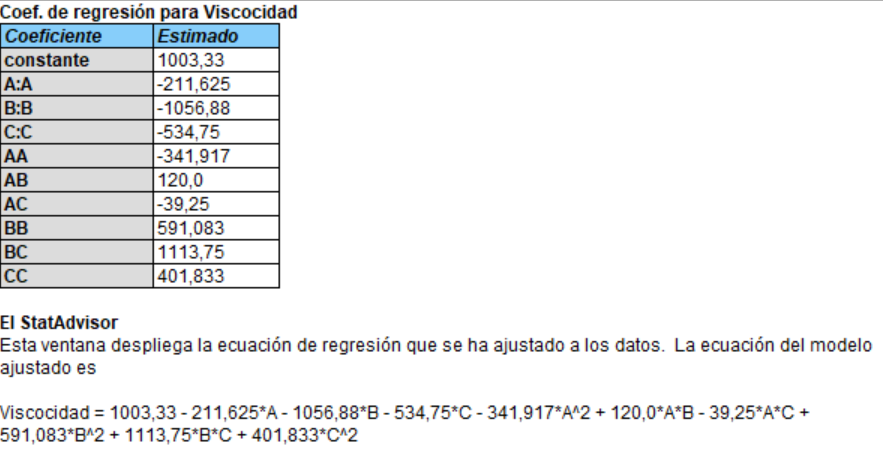

## **c. El Modelo Anova del Modelo de regresión lineal - Viscocidad**

In [13]:
anova_result2 = sm.stats.anova_lm(mod2, typ=1)
print (anova_result2)

                 df        sum_sq       mean_sq          F    PR(>F)
x               1.0  3.582811e+05  3.582811e+05   0.529275  0.499536
y               1.0  8.935878e+06  8.935878e+06  13.200637  0.015009
z               1.0  2.287660e+06  2.287660e+06   3.379475  0.125416
x:y             1.0  5.760000e+04  5.760000e+04   0.085090  0.782229
x:z             1.0  6.162250e+03  6.162250e+03   0.009103  0.927694
y:z             1.0  4.961756e+06  4.961756e+06   7.329816  0.042409
np.power(x, 2)  1.0  6.362954e+05  6.362954e+05   0.939975  0.376812
np.power(y, 2)  1.0  1.165520e+06  1.165520e+06   1.721779  0.246472
np.power(z, 2)  1.0  5.961970e+05  5.961970e+05   0.880739  0.391085
Residual        5.0  3.384639e+06  6.769278e+05        NaN       NaN


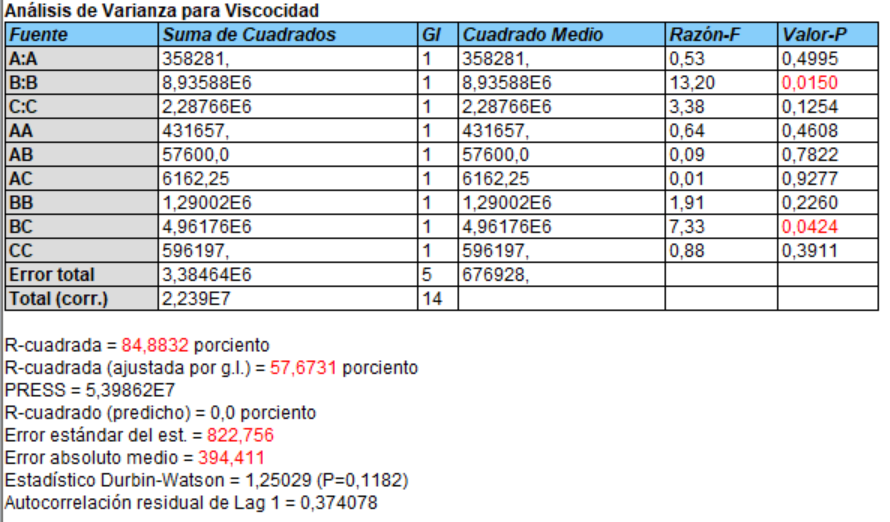

# **Paso_5. Optimizando el Modelo 1**





## **a. Extraer los  $β$  estimados para cada modelo1**

In [14]:
mod1 = sm.OLS.from_formula('w1 ~ (x+y+z)**2 +  np.power(x,2) + np.power(y,2) + np.power(z,2)', data=Behnken).fit()
print(mod1.summary())

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                     w1   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     14.07
Date:                Wed, 11 Oct 2023   Prob (F-statistic):            0.00476
Time:                        15:22:42   Log-Likelihood:                -98.396
No. Observations:                  15   AIC:                             216.8
Df Residuals:                       5   BIC:                             223.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       8476.6667    170.849     49.

## **b. Los valores de $β_{ij}$ para el modelo1**

In [15]:
mod1.params

Intercept         8476.666667
x                 -252.375000
y                -1093.750000
z                  -21.125000
x:y                -21.500000
x:z                 57.750000
y:z                361.500000
np.power(x, 2)      88.041667
np.power(y, 2)     -43.208333
np.power(z, 2)     343.041667
dtype: float64

In [16]:
!pip install texttable &>/dev/null
from texttable import Texttable


In [17]:
t1 = Texttable()
b0, b1, b2, b3, b12, b13, b23, b11, b22, b33 = mod1.params
# Tabla Resumen

t1.add_rows([['Parametro = bi','valor de bi para el modelo 1' ],
           ['b0',	b0],
           ['b1',	b1],
           ['b2',	b2],
           ['b3',	b3],
           ['b12',b12],
           ['b13',b13],
           ['b23',b23],
           ['b11',b11],
           ['b22',b22],
           ['b33',b33]])
print(t1.draw())


+----------------+------------------------------+
| Parametro = bi | valor de bi para el modelo 1 |
+================+==============================+
| b0             | 8476.667                     |
+----------------+------------------------------+
| b1             | -252.375                     |
+----------------+------------------------------+
| b2             | -1093.750                    |
+----------------+------------------------------+
| b3             | -21.125                      |
+----------------+------------------------------+
| b12            | -21.500                      |
+----------------+------------------------------+
| b13            | 57.750                       |
+----------------+------------------------------+
| b23            | 361.500                      |
+----------------+------------------------------+
| b11            | 88.042                       |
+----------------+------------------------------+
| b22            | -43.208                      |


## **c. El Modelo Estimado para el peso_mol**

In [18]:

print(f'El modelo estimado es Peso_mol = f(x,y,z)= {round(b0,1)}+{round(b1,1)}x+{round(b2,1)}y+{round(b3,1)}z+{round(b12,1)}xy+{round(b13,1)}xz+{round(b23,1)}yz+{round(b11,1)}x^2+{round(b22,1)}y^2+{round(b33,1)}z^2')

El modelo estimado es Peso_mol = f(x,y,z)= 8476.7+-252.4x+-1093.8y+-21.1z+-21.5xy+57.8xz+361.5yz+88.0x^2+-43.2y^2+343.0z^2


## **d. El CME del error o  $σ^2$ estimado:**

In [19]:
print(f'La varianza estimada del modelo es CME = mod.mse_resid = {mod1.mse_resid}')

La varianza estimada del modelo es CME = mod.mse_resid = 87568.28333333318


## **e. La gráfica de la superficie de Respuesta estimada**

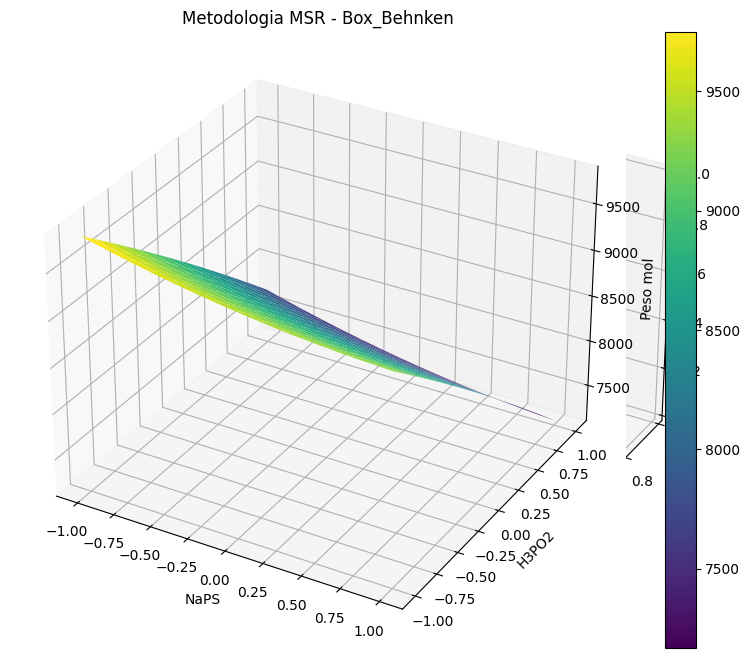

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,8))
ax3d = plt.axes(projection="3d")

xdata = np.linspace(-1,1,100)
ydata = np.linspace(-1,1,100)
zdata = np.linspace(-1,1,100)
X,Y = np.meshgrid(xdata,ydata)

w1 = round(b0,1)+round(b1,1)*X+round(b2,1)*Y+round(b12,1)*X*Y+round(b11,1)*X**2+round(b22,1)*Y**2

ax3d = plt.axes(projection='3d')
surf=ax3d.plot_surface(X, Y, w1, rstride=7, cstride=7, cmap="viridis")
fig.colorbar(surf, ax=ax3d)
ax3d.set_title('Metodologia MSR - Box_Behnken')
ax3d.set_xlabel('NaPS')
ax3d.set_ylabel('H3PO2')
ax3d.set_zlabel('Peso mol')

plt.savefig("Customized Surface Plot.png")

plt.show()

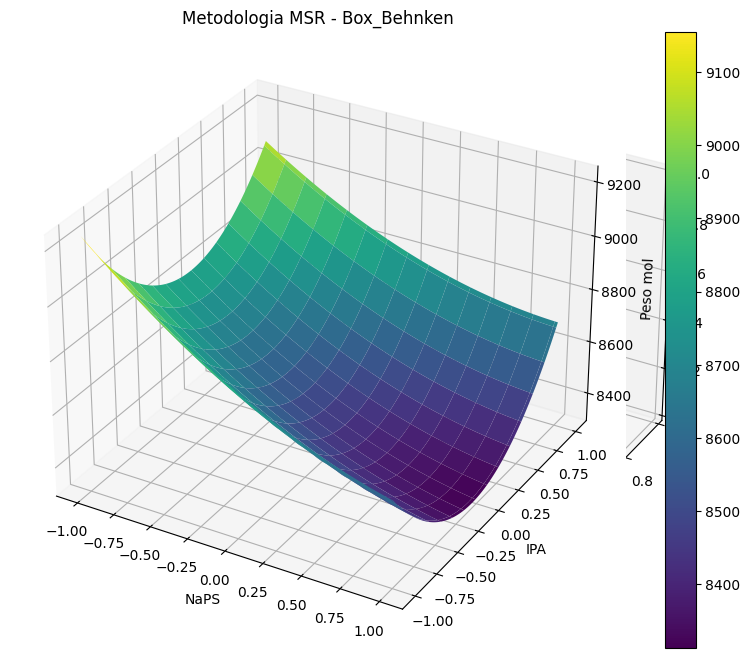

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,8))
ax3d = plt.axes(projection="3d")

xdata = np.linspace(-1,1,100)
ydata = np.linspace(-1,1,100)
zdata = np.linspace(-1,1,100)
X,Z = np.meshgrid(xdata,zdata)

w1 = round(b0,1)+round(b1,1)*X+round(b3,1)*Z+round(b13,1)*X*Z+round(b11,1)*X**2+round(b33,1)*Z**2

ax3d = plt.axes(projection='3d')
surf=ax3d.plot_surface(X, Z, w1, rstride=7, cstride=7, cmap="viridis")
fig.colorbar(surf, ax=ax3d)
ax3d.set_title('Metodologia MSR - Box_Behnken')
ax3d.set_xlabel('NaPS')
ax3d.set_ylabel('IPA')
ax3d.set_zlabel('Peso mol')

plt.savefig("Customized Surface Plot.png")

plt.show()

# **Paso_6. Encontrando el Mínimo para el peso molecular**

In [22]:
from scipy.optimize import minimize
from scipy.optimize import LinearConstraint


# Define la función a minimizar
def funcion_a_minimizar(x):
    return 8476.7 - 252.4*x[0] - 1093.8*x[1] - 21.1*x[2] - 21.5*x[0]*x[1] + 57.8*x[0]*x[2] + 361.5*x[1]*x[2] + 88.0*x[0]**2 - 43.2*x[1]**2 + 343.0*x[2]**2

# Define las restricciones
bounds = [(-1, 1), (-1, 1), (-1, 1)]  # Restricciones para x, y, y z

# Las restricciones para x, y, y z están definidas en bounds
linear_constraint = LinearConstraint([1, 0, 0], -1, 1)  # Restricción para x
constraints = [linear_constraint]

# Especifica un punto de partida inicial
x0 = [0, 0, 0]

# Llama a minimize para encontrar el mínimo
resultado = minimize(funcion_a_minimizar, x0, bounds=bounds, constraints=constraints)

# Imprime el resultado
print("Resultado de la optimización:")
print(resultado)


Resultado de la optimización:
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 7038.229788347215
       x: [ 1.000e+00  1.000e+00 -5.805e-01]
     nit: 4
     jac: [-1.315e+02 -1.412e+03 -1.221e-04]
    nfev: 17
    njev: 4


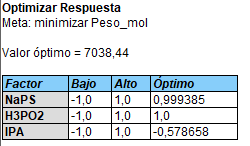

# **Paso_7. Optimizando el Modelo 2**

## **a. Extraer los  $β$  estimados para modelo2**

In [23]:
mod2 = sm.OLS.from_formula('w2 ~ (x+y+z)**2 +  np.power(x,2) + np.power(y,2) + np.power(z,2)', data=Behnken).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                     w2   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     3.120
Date:                Wed, 11 Oct 2023   Prob (F-statistic):              0.112
Time:                        15:22:50   Log-Likelihood:                -113.73
No. Observations:                  15   AIC:                             247.5
Df Residuals:                       5   BIC:                             254.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1003.3333    475.019      2.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## **b. Los valores de $β_{ij}$ para el modelo2**

In [24]:
mod2.params

Intercept         1003.333333
x                 -211.625000
y                -1056.875000
z                 -534.750000
x:y                120.000000
x:z                -39.250000
y:z               1113.750000
np.power(x, 2)    -341.916667
np.power(y, 2)     591.083333
np.power(z, 2)     401.833333
dtype: float64

In [25]:
t2 = Texttable()
b0, b1, b2, b3, b12, b13, b23, b11, b22, b33 = mod2.params
# Tabla Resumen

t2.add_rows([['Parametro = bi','valor de bi para el modelo 2' ],
           ['b0',	b0],
           ['b1',	b1],
           ['b2',	b2],
           ['b3',	b3],
           ['b12',b12],
           ['b13',b13],
           ['b23',b23],
           ['b11',b11],
           ['b22',b22],
           ['b33',b33]])
print(t2.draw())

+----------------+------------------------------+
| Parametro = bi | valor de bi para el modelo 2 |
+================+==============================+
| b0             | 1003.333                     |
+----------------+------------------------------+
| b1             | -211.625                     |
+----------------+------------------------------+
| b2             | -1056.875                    |
+----------------+------------------------------+
| b3             | -534.750                     |
+----------------+------------------------------+
| b12            | 120.000                      |
+----------------+------------------------------+
| b13            | -39.250                      |
+----------------+------------------------------+
| b23            | 1113.750                     |
+----------------+------------------------------+
| b11            | -341.917                     |
+----------------+------------------------------+
| b22            | 591.083                      |


## **c. El Modelo Estimado para la Viscocidad**

In [26]:
print(f'El modelo estimado es Viscocidad =')
print(f'f(x,y,z)= {round(b0,1)}+{round(b1,1)}x+{round(b2,1)}y+{round(b3,1)}z+{round(b12,1)}xy+{round(b13,1)}xz+{round(b23,1)}yz+{round(b11,1)}x^2+{round(b22,1)}y^2+{round(b33,1)}z^2')

El modelo estimado es Viscocidad =
f(x,y,z)= 1003.3+-211.6x+-1056.9y+-534.8z+120.0xy+-39.3xz+1113.8yz+-341.9x^2+591.1y^2+401.8z^2


## **d. La gráfica de la superficie de Respuesta estimada**

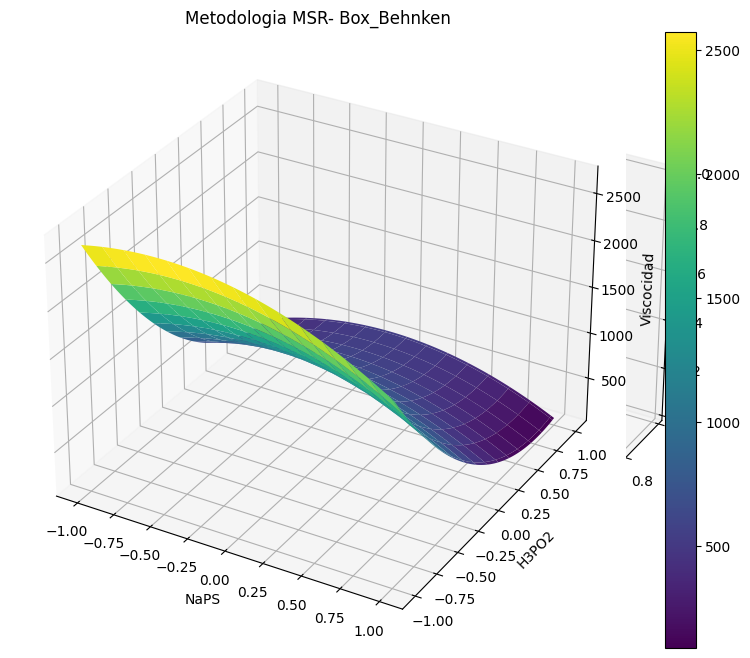

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,8))
ax3d = plt.axes(projection="3d")

xdata = np.linspace(-1,1,100)
ydata = np.linspace(-1,1,100)
zdata = np.linspace(-1,1,100)
X,Y = np.meshgrid(xdata,ydata)

Viscocidad= round(b0,1)+round(b1,1)*X+round(b2,1)*Y+round(b12,1)*X*Y+round(b11,1)*X**2+round(b22,1)*Y**2

ax3d = plt.axes(projection='3d')
surf=ax3d.plot_surface(X, Y, Viscocidad, rstride=7, cstride=7, cmap="viridis")
fig.colorbar(surf, ax=ax3d)
ax3d.set_title('Metodologia MSR- Box_Behnken')
ax3d.set_xlabel('NaPS')
ax3d.set_ylabel('H3PO2')
ax3d.set_zlabel('Viscocidad')

plt.savefig("Customized Surface Plot.png")

plt.show()

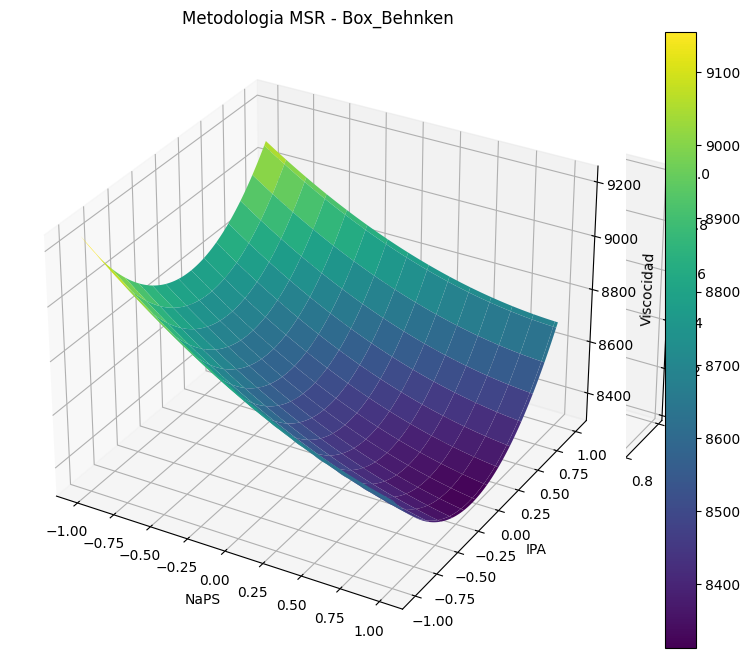

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,8))
ax3d = plt.axes(projection="3d")

xdata = np.linspace(-1,1,100)
ydata = np.linspace(-1,1,100)
zdata = np.linspace(-1,1,100)
X,Z = np.meshgrid(xdata,zdata)

Viscocidad = round(b0,1)+round(b1,1)*X+round(b3,1)*Z+round(b13,1)*X*Z+round(b11,1)*X**2+round(b33,1)*Z**2

ax3d = plt.axes(projection='3d')
surf=ax3d.plot_surface(X, Z, w1, rstride=7, cstride=7, cmap="viridis")
fig.colorbar(surf, ax=ax3d)
ax3d.set_title('Metodologia MSR - Box_Behnken')
ax3d.set_xlabel('NaPS')
ax3d.set_ylabel('IPA')
ax3d.set_zlabel('Viscocidad')

plt.savefig("Customized Surface Plot.png")

plt.show()

# **Paso_8. Encontrando la viscosidad mínima**

In [29]:
from scipy.optimize import minimize
from scipy.optimize import LinearConstraint


# Define la función a minimizar
def funcion_a_minimizar(x):
   return 1003.3-211.6*x[0]-1056.9*x[1]-534.8*x[2]+120.0*x[0]*x[1]-39.3*x[0]*x[2]+1113.8*x[1]*x[2]-341.9*x[0]**2+591.1*x[1]**2+401.8*x[2]**2

# Define las restricciones
bounds = [(-1, 1), (-1, 1), (-1, 1)]  # Restricciones para x, y, y z

# Las restricciones para x, y, y z están definidas en bounds
linear_constraint = LinearConstraint([1, 0, 0], -1, 1)  # Restricción para x
constraints = [linear_constraint]

# Especifica un punto de partida inicial
x0 = [0, 0, 0]

# Llama a minimize para encontrar el mínimo
resultado = minimize(funcion_a_minimizar, x0, bounds=bounds, constraints=constraints)

# Imprime el resultado
print("Resultado de la optimización:")
print(resultado)


Resultado de la optimización:
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -77.2320119680524
       x: [ 1.000e+00  1.000e+00 -6.716e-01]
     nit: 8
     jac: [-7.490e+02 -5.027e+02 -3.098e-03]
    nfev: 32
    njev: 7


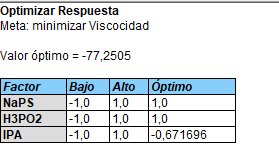

# **Paso_9. Encontrando el óptimo simultaneo**

In [16]:
from scipy.optimize import minimize
import numpy as np

# Supongamos que f(x, y, z) y g(x, y, z) son tus funciones
def f(x, y, z):
    return  8476.7-252.4*x-1093.8*y-21.1*z-21.5*x*y+57.8*x*z+361.5*y*z+88.0*x**2-43.2*y**2+343.0*z**2

def g(x, y, z):
    return 1003.3-211.6*x-1056.9*y-534.8*z+120.0*x*y-39.3*x*z+1113.8*y*z-341.9*x**2+591.1*y**2+401.8*z**2


# Pesos (ajusta estos según tus necesidades)
w1 = 1  # Mayor peso para f
w2 = 1  # Menor peso para g

# Restricciones
bounds = [(-1, 1), (-1, 1), (-1, 1)]  # Restricciones para x, y, y z

# Función de deseabilidad
def d(x, y, z):
    d1 = (f(x, y, z)-10504)/(7105-10504)
    d2 = (g(x, y, z)-5600)/(420-5600)
    return ((d1**w1)*(d2**w2))**(1/(w1+w2))

# Punto de partida inicial
x0 = [1, 1, 1]

# Llama a minimize para encontrar el máximo de la función de deseabilidad
resultado = minimize(lambda x: -d(x[0], x[1], x[2]), x0, bounds=bounds)

# Imprime el resultado
print("Resultado de la optimización:")
print(resultado)


Resultado de la optimización:
  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -1.056947344722148
        x: [ 1.000e+00  1.000e+00 -6.184e-01]
      nit: 3
      jac: [-9.031e-02 -2.587e-01  6.994e-06]
     nfev: 16
     njev: 4
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>


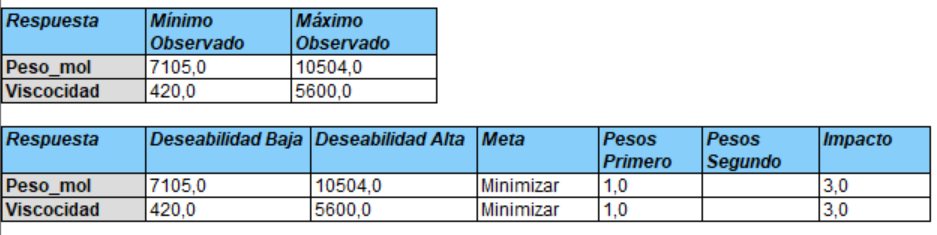

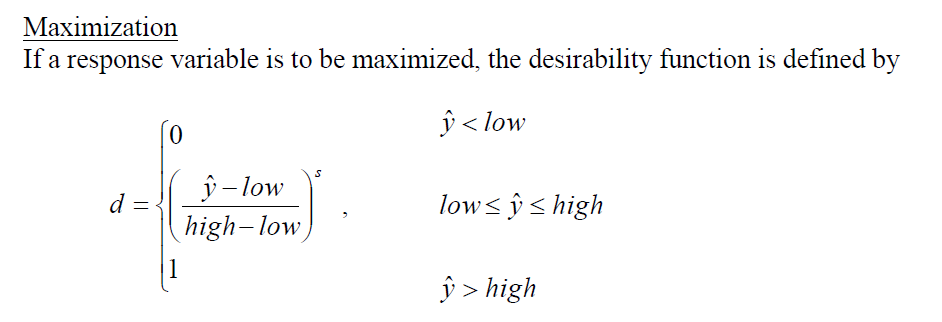

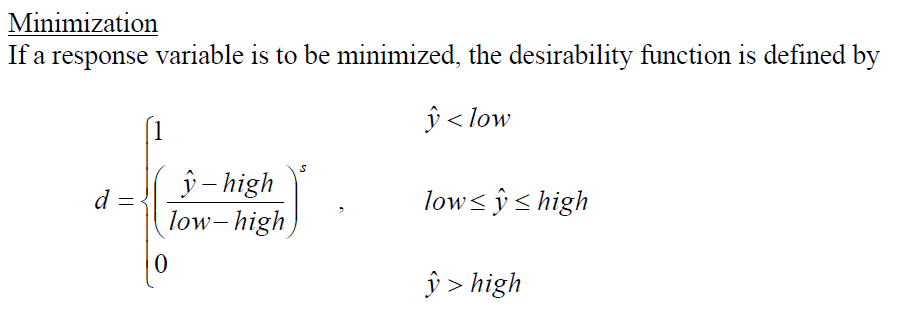